In [1]:
from generate_fragments import generate_fragments
from Multi_Nuclei_Segmentation import create_images, optimise_fragments, multi_segmentation
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter

59it [00:33,  1.77it/s]


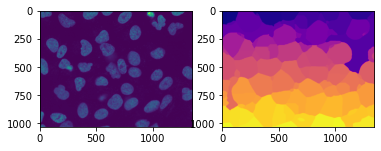

In [9]:
image = plt.imread('../images/dna-images/gnf/dna-0.png')[...,0]   
Omega,S = generate_fragments(image,16,0.01,20,2,100)

#gaus_img = gaussian_filter(image,16)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(image)
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(Omega,cmap='plasma')

In [10]:
Z = list(S)
ListOfCoords = create_images(Omega, Z)
len(Z)

540

In [11]:
theta, f = optimise_fragments(image, ListOfCoords)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-2)]: Done  27 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-2)]: Done  47 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done  58 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done  71 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-2)]: Done  84 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-2)]: Done  99 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-2)]: Done 131 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-2)]: Done 148 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-2)]: Done 167 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  5

In [12]:
seg = multi_segmentation(image, Omega, list(S), f, np.median(f), theta)

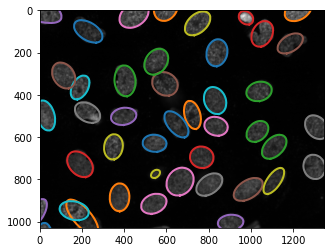

In [13]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for ellipse in seg:
    for contour in ellipse:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.show()